In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [79]:
def display(img):
    plt.figure(figsize=(12,10))
    plt.imshow(img,cmap='gray')

In [80]:
penny = cv2.imread('../DATA/pennies.jpg')

In [81]:
penny = cv2.medianBlur(penny,37)

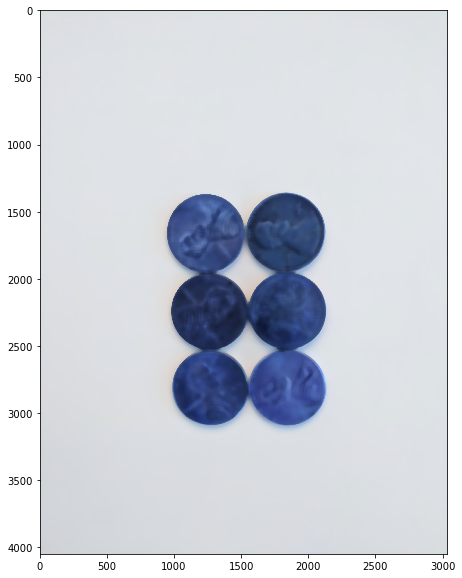

In [82]:
display(penny)

In [83]:
gray_peny = cv2.cvtColor(penny,cv2.COLOR_BGR2GRAY)

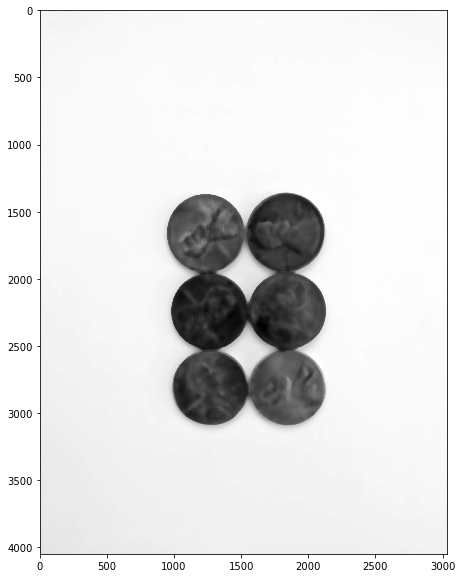

In [84]:
display(gray_peny)

In [89]:
ret , thresh = cv2.threshold(gray_peny,150,255,cv2.THRESH_BINARY_INV)

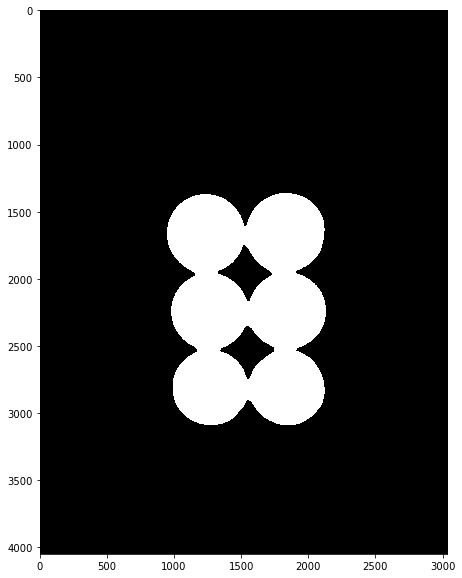

In [90]:
display(thresh)

In [92]:
kernel = np.ones((3,3))

In [94]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)

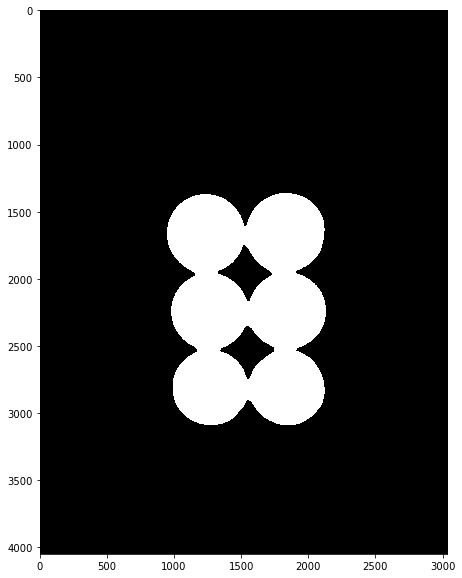

In [95]:
display(opening)

In [96]:
dist_trans = cv2.distanceTransform(opening,cv2.DIST_L2,5)

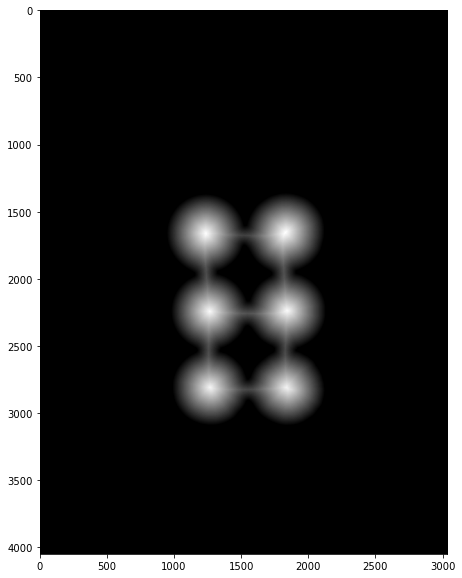

In [97]:
display(dist_trans)

In [104]:
ret , sure_fg = cv2.threshold(dist_trans,130,255,cv2.THRESH_BINARY)

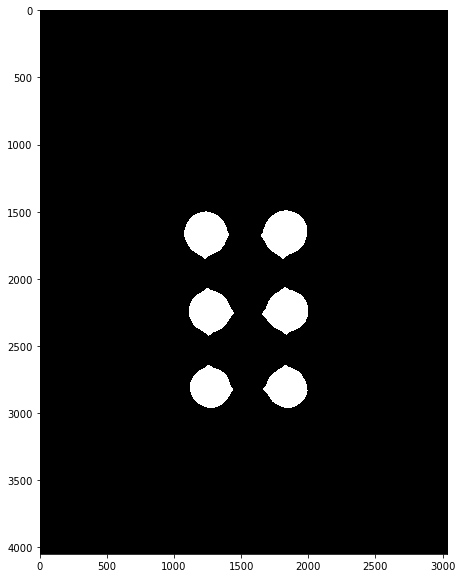

In [105]:
display(sure_fg)

In [113]:
sure_fg = sure_fg.astype(np.uint8)

In [114]:
unknown = cv2.subtract(opening,sure_fg)

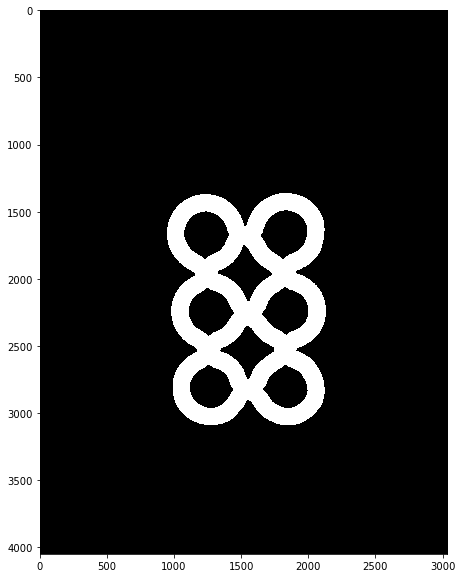

In [115]:
display(unknown)

In [132]:
ret ,  markers = cv2.connectedComponents(sure_fg)

In [133]:
markers = markers +1

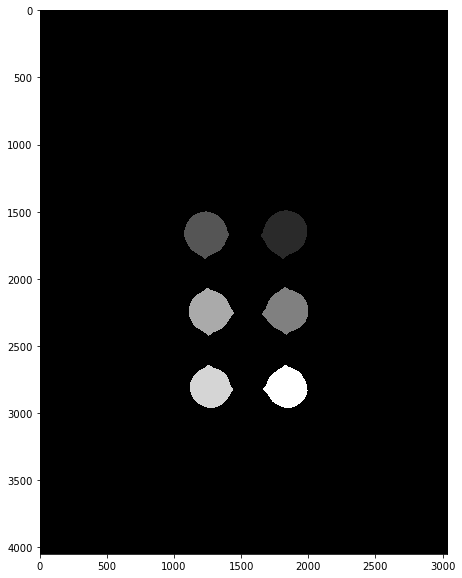

In [134]:
display(markers)

In [135]:
markers[unknown==255]=0

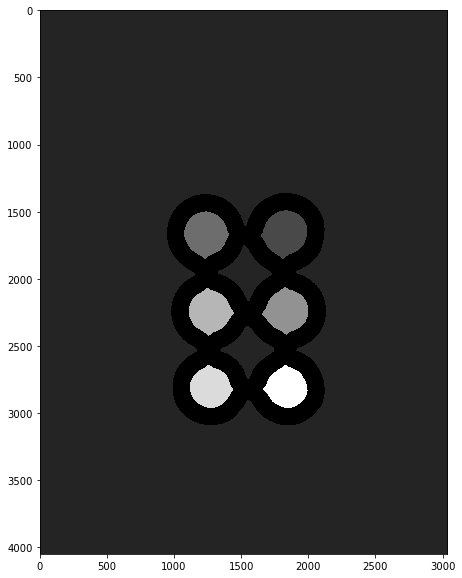

In [136]:
display(markers)

In [137]:
markers = cv2.watershed(penny,markers)

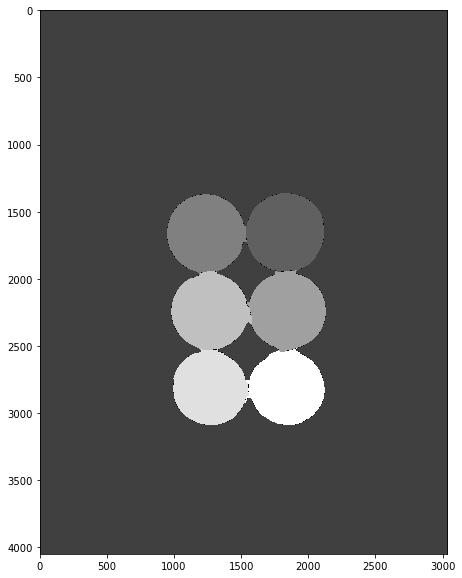

In [138]:
display(markers)

In [139]:
image, contours, hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [142]:
hierarchy.shape

(1, 10, 4)

In [146]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(penny,contours,i,(255,0,0),10)

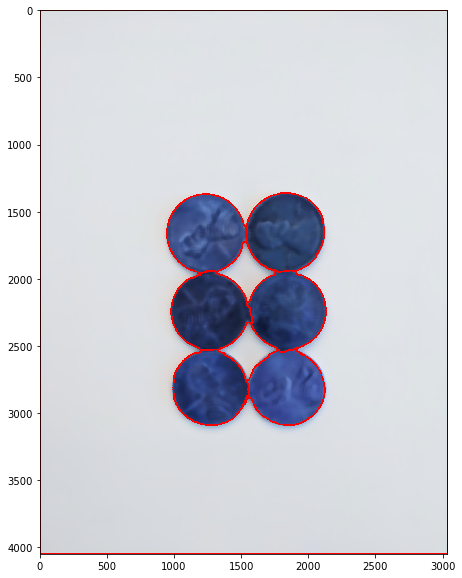

In [147]:
display(penny)